# Исследование надежности заемщиков


## Изучение общей информации о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [22]:
import matplotlib.pyplot as plt # подключаем библиотеку для визуализации полученных данных

In [23]:
# создали функцию, которая принимает на вход таблицу и имя столбца, по которому необходимо сгруппировать данные, и возвращать агрегированные значения по столбцу debt.
def aggregation_debt(data, column_name):
    return data.groupby(column_name)['debt'].agg(['count', 'sum', 'mean'])

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [24]:
# выразили общее количество людей, сколько всего имеют задолжность и конверсию возрата кредита в срок относительно количества детей у клиентов 
data_2 = aggregation_debt(data, 'children')
data_2

,count,sum,mean
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


In [25]:
# отсортировали таблицу по конверсии по убыванию: чем выше группа, тем больше вероятность задолженности
data_2.sort_values(by='mean', ascending=False) 

,count,sum,mean
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


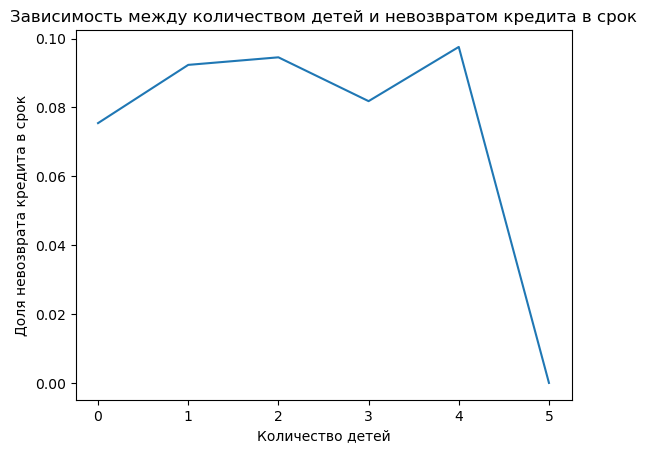

In [26]:
# визуализация полученных данных с помощью графика

x = list(data_2.index)
y = list(data_2['mean'])
plt.plot(x, y, label='Зависимость между количеством детей и невозвратом кредита в срок')
plt.title('Зависимость между количеством детей и невозвратом кредита в срок')
plt.xlabel('Количество детей')
plt.ylabel('Доля невозврата кредита в срок')
plt.show()

**Вывод:** 

Можно предположить, что количество детей непосредственно влияет на возврат кредита в срок. То есть чем больше детей у клиента, тем вероятнее, что могут быть задолжности по возврату кредита в срок. Посмотрим на полученные данные.

По полученным результам, можно заметить следующее:

- В выборке присутсвуют выдающиеся значения. Например, сравниваются 9 людей с 5 детьми против 14091 людей без детей. Поэтому нерационально учитывать группу с 5 детьми. Также можно сказать, про группу с 4 и 3 детьми.
- По количеству людей в каждой группе можно прийти к выводу, что чаще всего берут кредит люди без детей.
- Не учитывая группы с 3, 4, 5 детьми из-за большой разницы в данных, самая ответственная группа - группа, не имеющая детей, самая неотвественная - группа с 2 детьми. 
- Наличие детей влияет на возврат кредита в срок. Отсутсвие детей увеличивает вероятность возврата кредита в срок. Гипотеза подтверждена.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
# выразили общее количество людей, сколько всего имеют задолжность и конверсию возрата кредита в срок относительно семейного положения клиента 
data_3 = aggregation_debt(data, 'family_status')
data_3

,count,sum,mean
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


In [28]:
# отсортировали таблицу по конверсии по убыванию: чем выше группа, тем больше вероятность задолженности
data_3 = data_3.sort_values(by='mean', ascending=False)
data_3

,count,sum,mean
family_status,,,
Не женат / не замужем,2796,273,0.097639
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246


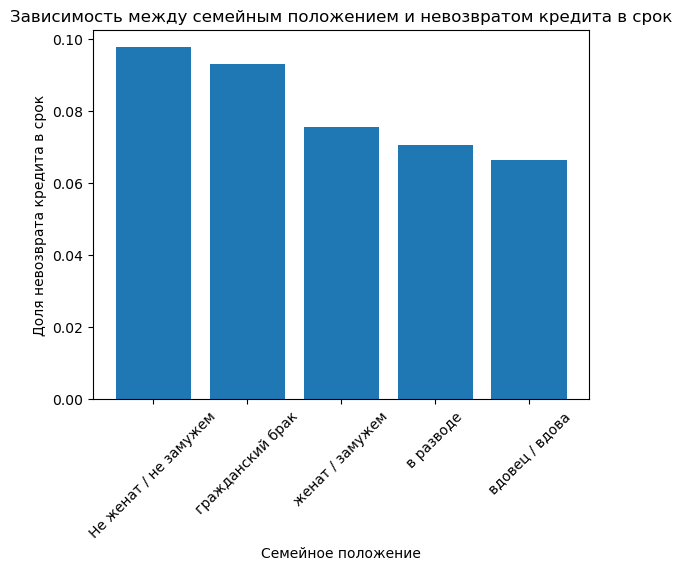

In [29]:
# визуализация полученных данных с помощью графика

x = list(data_3.index)
y = list(data_3['mean'])
plt.bar(x, y, label='Зависимость между семейным положением и невозвратом кредита в срок')
plt.title('Зависимость между семейным положением и невозвратом кредита в срок')
plt.xlabel('Семейное положение')
plt.ylabel('Доля невозврата кредита в срок')
plt.xticks(rotation=45)
plt.show()

**Вывод:** 

Предположим, что люди, которые не имели собственный семейный опыт, менее отвественно подоходят к возврату кредита в срок. Посмотрим на полученные данные.

По полученным результатам можно прийти к следующему:

- Больше всего имеет задолженности группа со статусом "Не женат/не замужем".
- Меньше всего задолженность проявляется у группы со статусом "Вдовец/вдова".
- Больше всего клиентов находятся в статусе "Женат/замужем", а меньше всего в статусе "Вдовец/вдова".
- Посмотрев глобально на вопрос, мы можем сказать, что группы, имеющие семьи, более ответсвенно подходят к погашению кредита. Гипотеза подтверждена.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Уровни дохода**:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [30]:
# выразили общее количество людей имеющих определенный уровень дохода, сколько всего имеют задолжность и конверсию возрата кредита в срок относительно уровня дохода клиента
data_4 = aggregation_debt(data, 'total_income_category')
data_4

,count,sum,mean
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


In [31]:
# отсортировали таблицу по конверсии по убыванию: чем выше группа, тем больше вероятность задолженности
data_4.sort_values(by='mean', ascending=False)

,count,sum,mean
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


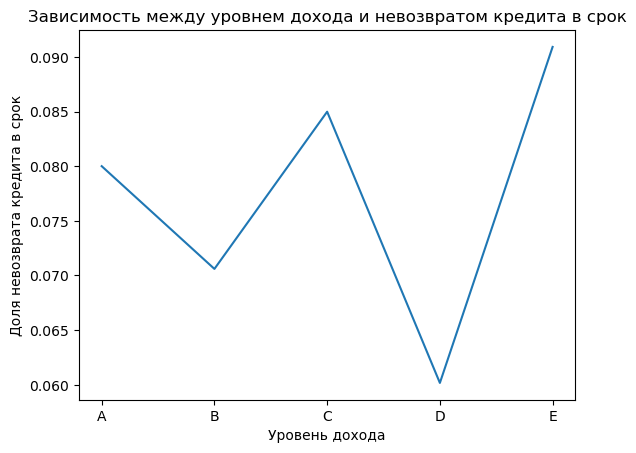

In [32]:
# визуализация полученных данных с помощью графика

x = list(data_4.index)
y = list(data_4['mean'])
plt.plot(x, y, label='Зависимость между уровнем дохода и невозвратом кредита в срок')
plt.title('Зависимость между уровнем дохода и невозвратом кредита в срок')
plt.xlabel('Уровень дохода')
plt.ylabel('Доля невозврата кредита в срок')
plt.show()

**Вывод:** 

Предположим, что чем выше уровень дохода, то тем вероятнее возврат кредита в срок. Посмотрим по полученным данным:

- Обратим внимание на выборку групп `E`, `A`, `D` относительно `C`, `B` по параметру `count`. Видим, что присутсвуют выдающиеся значения, из-за чего сравнение может быть нерациональным.
- Чаще всего берут кредит группа с уровнем дохода `C`, а реже всего `E`.
- Чаще всего возвращают кредит в срок группа с уровнем дохода `B`, если опустить выборку с малым количесвом данных. И реже берет группа с более низким уровнем дохода. Однако всё же недостаточно данных для выявления явной зависимости, поставленной в вопросе. Также в исходных данных были замечаны пропущенные значения в столбце `total_income` в количестве 2174, которые непосредственно определяют уровень дохода. Они были заполнены медианным значением, зависящим от типа занятости клиента, но в любом случае они могут не полностью раскрыть поставленный вопрос. Поэтому гипотеза подтверждена не до конца и недостаточно.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [33]:
# выразили общее количество людей имеющих определенную цель кредита, сколько всего имеют задолжность и конверсию возрата кредита в срок относительно цели кредита клиента
data_5 = aggregation_debt(data, 'purpose_category')
data_5

,count,sum,mean
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


In [34]:
# отсортировали таблицу по конверсии по убыванию: чем выше группа, тем больше вероятность задолженности
data_5 = data_5.sort_values(by='mean', ascending=False)
data_5

,count,sum,mean
purpose_category,,,
операции с автомобилем,4279,400,0.093480
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
операции с недвижимостью,10751,780,0.072551


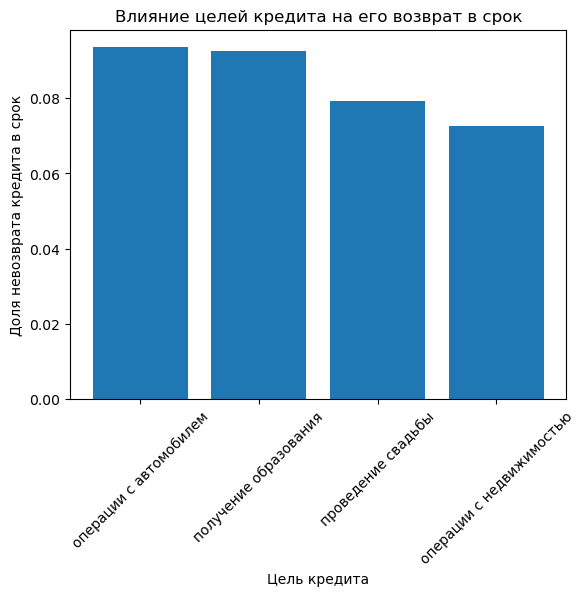

In [35]:
# визуализация полученных данных с помощью графика

x = list(data_5.index)
y = list(data_5['mean'])
plt.bar(x, y, label='Влияние целей кредита на его возврат в срок')
plt.title('Влияние целей кредита на его возврат в срок')
plt.xlabel('Цель кредита')
plt.ylabel('Доля невозврата кредита в срок')
plt.xticks(rotation=45)
plt.show()

**Вывод:** 

Предположим, что конкретные цели влияют на возврат кредита в срок.

По полученным результам, можно прийти к следующему:

- Чаще всего берут кредит люди, имеющие цель, связанную с операциями недвижмостью, а реже - с проведением свадьбы.
- Чаще всего возвращают кредит в срок группа - операции с недвижимостью, реже - операции с автомобилем.
- Цели, связанные с постороением семьи и с базовыми потребностями повышают мотивацию закрыть как можно быстрее кредит. Цели дейсвтительно влияют на возврат налога в срок. Гипотеза подтверждена.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Пропуски могут возникнуть по двум факторам: технологическим и человеческим. Рассмотрим, с какими пропусками мы столкнулись в исходных данных.

Оказалось, что в двух столбцах есть пропущенные значения: `days_employed`, `total_income` в одинаковом количестве 2174 и в одинаковых строках. Либо могла произойти техническая ошибка: при формировании таблицы, при записи данных, при смене формата и т.д. Либо могла произойти человеческая ошибка при записи данных, но кажется из-за количества пропущенных значений это менее вероятно.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Заполнить пропуски медианным значением действительно может являться лучшим решением в случае с количественнными переменными. Так как может попасться такая выборка данных, что значения могут быть выдающимися, между ними может быть значительная разница. И тогда вероятность как можно лучше оценить типичные значения выборки может уменьшиться, если использовать среднее значение, вместо медианного.

### Шаг 4: общий вывод.

Были получены входные данные от банка — статистика о платёжеспособности клиентов.

**Описание данных**
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита
- `total_income_category` - дополнительный столбец, созданный в процессе анализа, раскрывающий уровень дохода клиента
- `purpose_category` - дополнительный столбец, созданный в процессе анализа, формирующий конкретно цель клиента

**Результаты работы:**
1. Сначала была изучена предоставленная информация. 
2. Далее по таблице была выполнена предобработка данных:
   - Были заменены пропуски в столбцах `days_employed`, `total_income` медианным значением, зависящим от другого фактора `income_type`.
   - Были обработаны аномальные значения в нескольких столбцах `days_employed`, `children`.
   - Был изменен тип данных в столбце `total_income` на целочисленный.
   - Были обработаны дупликаты в столбце `education`.
   - Была проведена категоризация данных, в процессе которой добавились новые столбцы `total_income_category` и `purpose_category`.

Представленные данные позволили ответить на вопросы и выявить следующие закономерности.


**Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?**

*Ответ:* можно сказать, что да, есть. Чем больше детей у клиентов, тем чаще возможность непогашеннных кредитов в срок. По предоставленным данным, не рассматривались группы с `3`, `4`, `5` детьми, так как имеют малую выборку. Прямая зависимость с группами с `0`, `1` и `2` представлена на графике ниже.

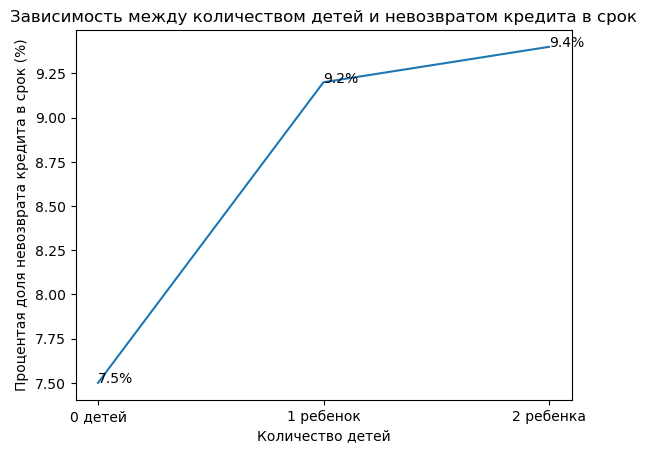

In [36]:
# визуализация полученных данных с помощью графика

x = [0, 1, 2]
y = [7.5, 9.2, 9.4]
plt.plot(x, y, label='Зависимость между количеством детей и невозвратом кредита в срок')
plt.title('Зависимость между количеством детей и невозвратом кредита в срок')
plt.xlabel('Количество детей')
plt.xticks(x, ['0 детей', '1 ребенок', '2 ребенка'])
plt.ylabel('Процентая доля невозврата кредита в срок (%)')
for i in range(len(x)):
    plt.text(x[i], y[i], f'{y[i]}%', ha='left')
plt.show()

**Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?**

*Ответ:* да, есть. Полученные данные показали, что клиенты в статусе `"Не женат/ не замужем"` чаще всего не возвращают в срок кредит (**9,8%**), а реже всего не возвращают клиенты в статусе `"Вдовец/ вдова"` (**6,7%**). Общий вывод приводит к тому, что клиенты, имеющие семейный опыт, чаще всего возвращают кредит в срок, так как они могут быть более отвественными.

**Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?** 

*Ответ:* на данный вопрос можно дать частично положительный ответ. По предоставленным данным, не рассматривались группы с уровнем дохода `E`, `A`, `D`. Так они имеют большой разброс в значениях и присутсвуют пропуски, замененные медианным значением по типу занятости клиентов. Поэтому полный ответ на данный вопрос не возможен. Но если рассуждать по данным групп c `B` (**7,1%**), `C` (**8,5%**), то можно заметить, что чем выше уровень дохода, тем меньше вероятность невозврата кредита в срок.

**Вопрос 4: Как разные цели кредита влияют на его возврат в срок?**

*Ответ:* разные цели кредита непосредственно влияют на его возврат в срок. Результаты представлены ниже на графике.

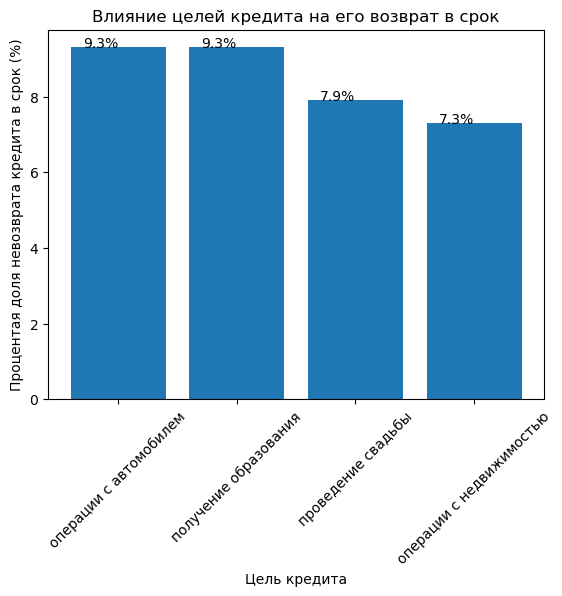

In [37]:
# визуализация полученных данных с помощью графика

y = [9.3, 9.3, 7.9, 7.3]
x = ['операции с автомобилем', 'получение образования', 'проведение свадьбы', 'операции с недвижимостью']
plt.bar(x, y, label='Влияние целей кредита на его возврат в срок')
plt.title('Влияние целей кредита на его возврат в срок')
plt.xlabel('Цель кредита')
plt.ylabel('Процентая доля невозврата кредита в срок (%)')
plt.xticks(rotation=45)
for i in range(len(x)):
    plt.text(x[i], y[i], f'{y[i]}%', ha='right')
plt.show()

**Итоги:**

Проанализировав результат, мы пришли к выводу, что вполне можно пользоваться при построении модели кредитного скоринга полученными данными, связанными с вопросами `2` и `4`. Можно также приглядеться к вопросу `1`, но всё-таки лучше провести более широкую выборку данных. Тоже касается и вопроса `3`, в котором явно не достает данных для полного подтверждения зависимости, поставленной в вопросе, а также рекомендуется здесь разбить данные более детально, ведь уровни дохода имеют довольно больший диапазон.